In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# data cell
plexi_width = [3.77, 3.72, 3.72]
plexi_ad = [7.26, 7.21, 7.12, 7.08, 7.14, 7.12,7.11, 7.10, 7.17, 7.13]
plexi_ag = [4.50, 4.60, 4.55, 4.53, 4.58, 4.57, 4.50, 4.53, 4.56, 4.51]
glass_ad = [7.23, 7.17, 7.16, 7.13, 7.15, 7.16, 7.21, 7.11, 7.19, 7.20]
glass_ag = [4.68, 4.66, 4.71, 4.69, 4.66, 4.70, 4.72, 4.69, 4.68, 4.66]

glass_width = [3.7, 3.72, 3.71]


In [29]:
# helper functions

def mean(arr):
    return sum(arr) / len(arr)

def var(arr):
    mu = mean(arr)
    return sum([(x-mu)**2 for x in arr]) / (len(arr)-1)

def std(arr):
    from math import sqrt
    variance = var(arr)
    return sqrt(variance)

def outliers(arr):
    mu = mean(arr)
    sigma = std(arr)
    outs = []
    low = mu - 3*sigma
    high = mu + 3*sigma
    for x in arr:
        if not (low < x and high > x):
            outs.append(x)
    return outs

def err(arr):
    from math import sqrt
    sigma = std(arr)
    return sigma / sqrt(len(arr))

def summary(arr):
    mu = mean(arr)
    sigma = std(arr)
    error = err(arr)
    outs = outliers(arr)

    return {
        "mean" : mu,
        "std" : sigma,
        "min" : min(arr),
        "max" : max(arr),
        "err" : error,
        "3sigma" : [mu-3*sigma, mu+3*sigma],
        "outliers" : outs,
    }
    

In [30]:
summary(plexi_width)

{'mean': 3.736666666666667,
 'std': 0.028867513459481187,
 'min': 3.72,
 'max': 3.77,
 'err': 0.016666666666666607,
 '3sigma': [3.6500641262882234, 3.82326920704511],
 'outliers': []}

In [31]:
summary(glass_width)

{'mean': 3.7099999999999995,
 'std': 0.010000000000000009,
 'min': 3.7,
 'max': 3.72,
 'err': 0.005773502691896263,
 '3sigma': [3.6799999999999997, 3.7399999999999993],
 'outliers': []}

In [32]:
plexi_ad, plexi_ag = np.array(plexi_ad), np.array(plexi_ag)
plexi_h = plexi_ad - plexi_ag
plexi_h

array([2.76, 2.61, 2.57, 2.55, 2.56, 2.55, 2.61, 2.57, 2.61, 2.62])

In [33]:
summary(plexi_h)

{'mean': 2.601,
 'std': 0.062084172253839776,
 'min': 2.55,
 'max': 2.76,
 'err': 0.019632739096836306,
 '3sigma': [2.4147474832384805, 2.7872525167615194],
 'outliers': []}

In [34]:
glass_ad, glass_ag = np.array(glass_ad), np.array(glass_ag)

In [35]:
glass_h = glass_ad - glass_ag
glass_h

array([2.55, 2.51, 2.45, 2.44, 2.49, 2.46, 2.49, 2.42, 2.51, 2.54])

In [36]:
summary(glass_h)

{'mean': 2.486,
 'std': 0.04299870799092582,
 'min': 2.42,
 'max': 2.5500000000000007,
 'err': 0.013597385369580828,
 '3sigma': [2.357003876027223, 2.6149961239727775],
 'outliers': []}

In [37]:
glass_h

array([2.55, 2.51, 2.45, 2.44, 2.49, 2.46, 2.49, 2.42, 2.51, 2.54])

In [38]:
mean(glass_width) / mean(glass_h)

1.4923572003218017

In [39]:
mean(plexi_width) / mean(plexi_h)

1.4366269383570422

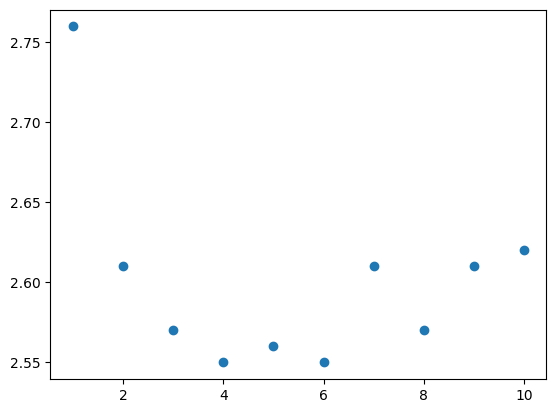

In [41]:
plt.style.use("default")
plt.scatter(np.arange(1, len(plexi_h)+1), plexi_h)

In [44]:
plexi_h

array([2.76, 2.61, 2.57, 2.55, 2.56, 2.55, 2.61, 2.57, 2.61, 2.62])

In [45]:
summary(plexi_h)

{'mean': 2.601,
 'std': 0.062084172253839776,
 'min': 2.55,
 'max': 2.76,
 'err': 0.019632739096836306,
 '3sigma': [2.4147474832384805, 2.7872525167615194],
 'outliers': []}

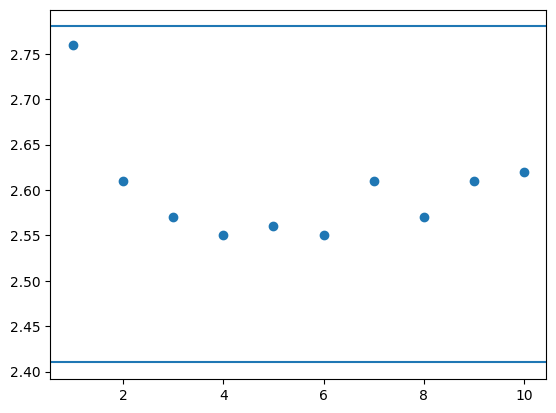

In [46]:
plt.scatter(np.arange(1, len(plexi_h)+1), plexi_h)
plt.axhline(2.41)
plt.axhline(2.78)

In [51]:
mean(plexi_width) / mean(plexi_h)

1.4366269383570422

In [52]:
summary(plexi_width)

{'mean': 3.736666666666667,
 'std': 0.028867513459481187,
 'min': 3.72,
 'max': 3.77,
 'err': 0.016666666666666607,
 '3sigma': [3.6500641262882234, 3.82326920704511],
 'outliers': []}

In [53]:
summary(glass_width)

{'mean': 3.7099999999999995,
 'std': 0.010000000000000009,
 'min': 3.7,
 'max': 3.72,
 'err': 0.005773502691896263,
 '3sigma': [3.6799999999999997, 3.7399999999999993],
 'outliers': []}

In [163]:
# plots
def get_x(data):
    return [x+1 for x in range(len(data))]

def plot_data_with_3sigma(data, xlabel, ylabel, var,title, savepath=None):
    x_intervals = get_x(data)

    mu = mean(data)
    sigma = std(data)
    low = mu - 3 * sigma
    high = mu + 3*sigma
    x_max = len(data)
    plt.rcParams["figure.figsize"] = 8,5
    if savepath:
        plt.figure()
    plt.xticks(range(1, len(x_intervals)+1))
    plt.yticks(np.arange(0.9 * low, 1.1 * high, 0.025))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

    
    plt.hlines(high,0, x_max, label="+3S", linestyle="--",color="black")
    plt.hlines(mu, 0, x_max, label=var, color="gray")
    plt.hlines(low, 0, x_max, label="-3S", linestyles = "-.", color="black")
    plt.legend(loc='best', bbox_to_anchor=(0.85,0.35))
    plt.scatter(x_intervals, data, c="black")
    if savepath:
        plt.savefig(savepath)


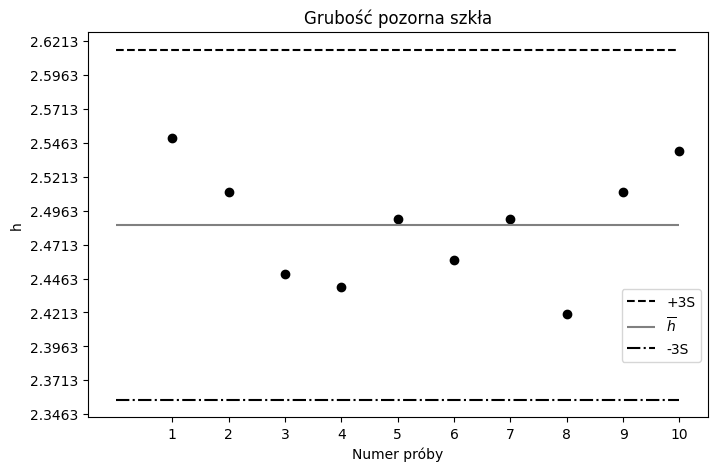

In [164]:
 plot_data_with_3sigma(glass_h, "Numer próby", "h", r"$\overline{h}$", "Grubość pozorna szkła", "pozorne_szklo.png")

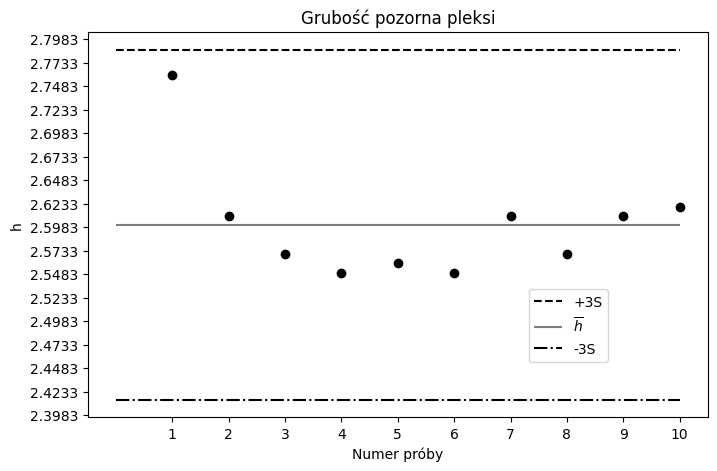

In [165]:
plot_data_with_3sigma(plexi_h, "Numer próby","h" , "$\overline{h}$", "Grubość pozorna pleksi", "pozorne_pleksi.png")

In [166]:
summary(glass_h)

{'mean': 2.486,
 'std': 0.04299870799092582,
 'min': 2.42,
 'max': 2.5500000000000007,
 'err': 0.013597385369580828,
 '3sigma': [2.357003876027223, 2.6149961239727775],
 'outliers': []}

In [167]:
summary(plexi_h)

{'mean': 2.601,
 'std': 0.062084172253839776,
 'min': 2.55,
 'max': 2.76,
 'err': 0.019632739096836306,
 '3sigma': [2.4147474832384805, 2.7872525167615194],
 'outliers': []}

In [168]:
# Plexi

In [125]:
plexi_h_s = summary(plexi_h)
plexi_width_s = summary(plexi_width)

In [126]:
plexi_h_s

{'mean': 2.601,
 'std': 0.062084172253839776,
 'min': 2.55,
 'max': 2.76,
 'err': 0.019632739096836306,
 '3sigma': [2.4147474832384805, 2.7872525167615194],
 'outliers': []}

In [127]:
plexi_width_s

{'mean': 3.736666666666667,
 'std': 0.028867513459481187,
 'min': 3.72,
 'max': 3.77,
 'err': 0.016666666666666607,
 '3sigma': [3.6500641262882234, 3.82326920704511],
 'outliers': []}

In [129]:
P_d = plexi_width_s['mean']
P_h = plexi_h_s['mean']
P_u_d = plexi_width_s['err']
P_u_h = plexi_h_s['err']

In [138]:
from math import sqrt
# plexi - niepewność
U_P = sqrt((P_u_d * (1/P_h))**2 + (P_u_h * (P_d/(P_h**2)))**2)

In [143]:
# plexi - n
N_P = P_d / P_h

In [144]:
glass_width_s = summary(glass_width)
glass_h_s = summary(glass_h)
G_d = glass_width_s['mean']
G_h = glass_h_s['mean']
G_u_d = glass_width_s['err']
G_u_h = glass_h_s['err']

In [145]:
U_G = sqrt((G_u_d * (1/G_h))**2 + (G_u_h * (G_d / (G_h**2)))**2)

In [146]:
N_G = G_d / G_h

In [149]:
U_P

0.012595612197096139